# Initializations for python environment

In [3]:
# first time to create venv and install packages

# %conda create -n corrid-dev anaconda -y
# %conda activate corrid-dev -y

# %conda install -n corrid-dev pandas -y
# %conda install -n corrid-dev xgboost -y

# %conda install pip


# Descriptive Analysis of the adated dataset

In [19]:
import pandas as pd

logs_folder = "./logs/"
bpic17_logs_with_interventions_path = (
    "data_bpic17_readyToUse.csv"
)

bpic17_logs_with_interventions_preprocessed_path = (
    "data_bpic17_readyToUse_preprocessed.csv"
)


# Load the dataset
def load_logs(path):
    return pd.read_csv(logs_folder + path)

# Store the dataset
def store_logs(dataframe, path):
    dataframe.to_csv(logs_folder + path, columns=dataframe.columns, index=False)



data_df = load_logs(bpic17_logs_with_interventions_path)


# Display the first few rows of the dataset
data_df.head()



,Case ID,ApplicationType,LoanGoal,RequestedAmount,CreditScore,timesincefirstcase,duration,treatment,Activity_A_Accepted,Activity_A_Cancelled,...,lifecycle:transition_suspend,lifecycle:transition_withdraw,FirstWithdrawalAmount,MonthlyCost,NumberOfTerms,OfferedAmount,open_cases,month,weekday,hour
0,Application_652823628,New credit,Existing loan takeover,20000.0,979.0,0.000000,13.248566,1,1,0,...,4,1,20000.0,498.29,44.0,20000.0,815,1,3,9
1,Application_1691306052,New credit,Home improvement,10000.0,899.0,0.017317,6.134470,0,1,0,...,5,1,500.0,200.00,33.0,6000.0,431,1,3,11
2,Application_428409768,New credit,Home improvement,15000.0,1059.0,0.061376,12.819864,1,1,0,...,3,1,15000.0,158.98,120.0,15000.0,790,1,2,12
3,Application_1746793196,New credit,Car,5000.0,834.0,0.113641,26.988859,1,1,0,...,12,0,3726.0,252.73,72.0,15700.0,1240,1,1,8
4,Application_828200680,New credit,Home improvement,35000.0,899.0,0.131123,31.750191,0,1,0,...,1,1,35000.0,366.08,120.0,35000.0,340,1,2,9


In [20]:
# Summary statistics for numerical columns
numerical_summary = data_df.describe()

numerical_summary

,RequestedAmount,CreditScore,timesincefirstcase,duration,treatment,Activity_A_Accepted,Activity_A_Cancelled,Activity_A_Complete,Activity_A_Concept,Activity_A_Create Application,...,lifecycle:transition_suspend,lifecycle:transition_withdraw,FirstWithdrawalAmount,MonthlyCost,NumberOfTerms,OfferedAmount,open_cases,month,weekday,hour
count,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.0,...,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000,31413.000000
mean,16211.381892,898.684780,189.042793,21.877431,0.476172,0.989399,0.057428,0.843950,0.999618,1.0,...,3.145035,0.648076,10627.900319,277.785523,82.674689,17969.043181,1896.262344,6.819597,2.155286,10.981536
std,15400.978142,66.999179,101.993112,13.132724,0.499440,0.102414,0.232663,0.362909,0.019542,0.0,...,2.187892,0.638160,9352.869929,184.629287,36.225731,13709.505812,411.551141,3.357781,1.618377,3.252194
min,0.000000,592.000000,0.000000,0.002327,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.250000,43.050000,6.000000,0.000000,27.000000,1.000000,0.000000,2.000000
25%,6000.000000,899.000000,101.405038,11.332593,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,2.000000,0.000000,5500.000000,152.820000,56.000000,8000.000000,1596.000000,4.000000,1.000000,8.000000
50%,12500.000000,899.000000,194.902894,19.072310,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,3.000000,1.000000,8304.000000,246.580000,78.000000,15000.000000,1927.000000,7.000000,2.000000,11.000000
75%,21000.000000,899.000000,275.356671,31.491286,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,4.000000,1.000000,11404.000000,346.920000,120.000000,25000.000000,2253.000000,10.000000,4.000000,13.000000
max,450000.000000,1145.000000,365.490717,286.072438,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,47.000000,3.000000,75000.000000,3260.920000,180.000000,75000.000000,2701.000000,12.000000,6.000000,23.000000


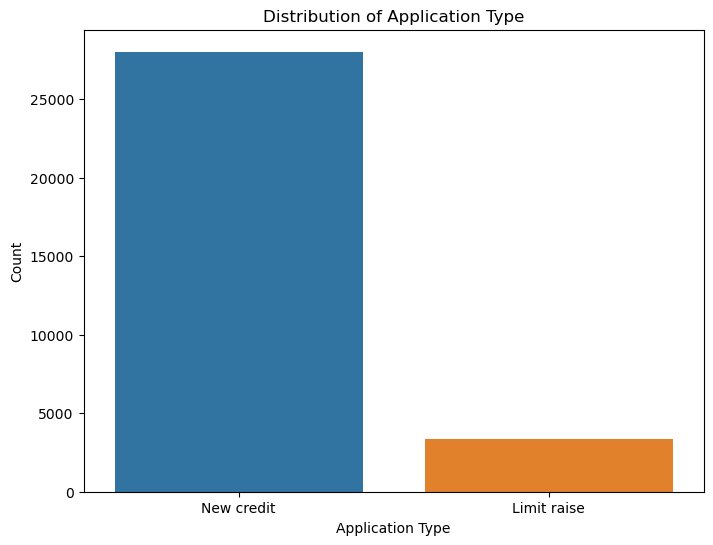

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

outputs_folder = "./outputs/"

plt.figure(figsize=(8, 6))

# Plotting the distribution of ApplicationType
sns.countplot(data=data_df, x='ApplicationType')
plt.title('Distribution of Application Type')
plt.ylabel('Count')
plt.xlabel('Application Type')

# plt.show()
plt.savefig(outputs_folder + 'application_type.png')


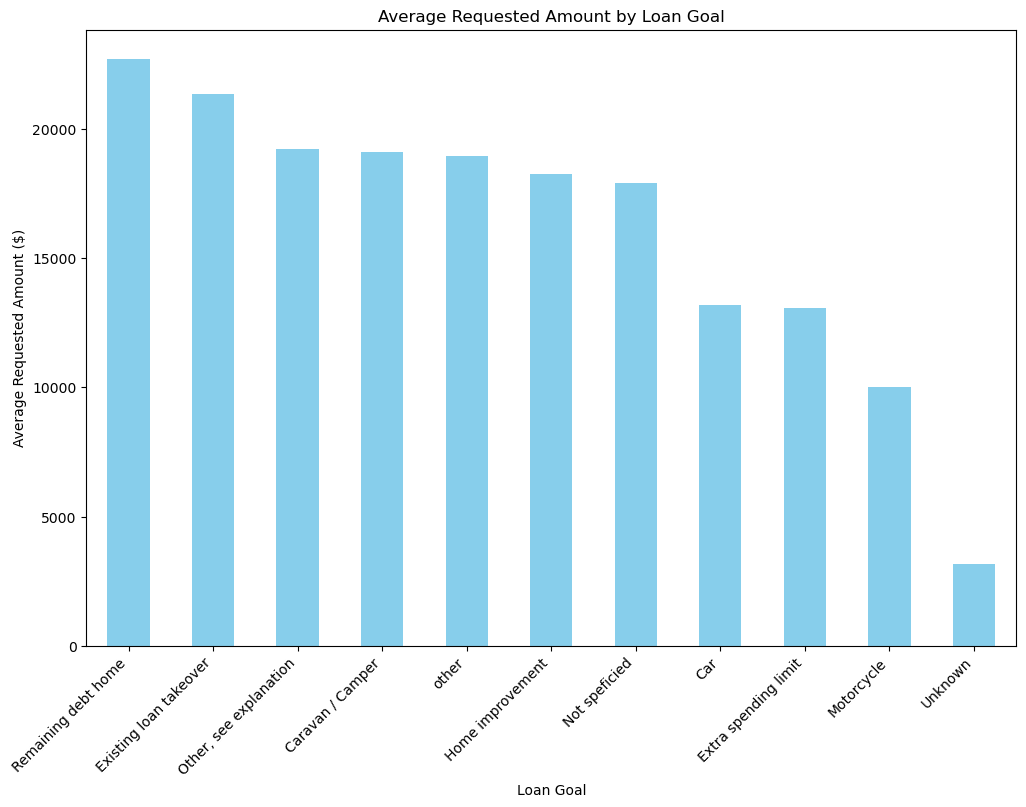

In [22]:
# Plotting the Average Requested Amount by Loan Goal
avg_amount_by_goal = data_df.groupby('LoanGoal')['RequestedAmount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_amount_by_goal.plot(kind='bar', color='skyblue')
plt.title('Average Requested Amount by Loan Goal')
plt.ylabel('Average Requested Amount ($)')
plt.xlabel('Loan Goal')
plt.xticks(rotation=45, ha='right')
# plt.show()

plt.savefig(outputs_folder + 'avg_requested_amount.png')


# Data Extraction

In [23]:
data_extracted_df = data_df[['ApplicationType', 'LoanGoal', 'RequestedAmount', 
                             'CreditScore', 'timesincefirstcase', 'duration', 
                             'FirstWithdrawalAmount', 'MonthlyCost', 'NumberOfTerms', 
                             'OfferedAmount', 'open_cases', 'month', 'weekday', 'hour', 'treatment']]

data_extracted_df.head()

,ApplicationType,LoanGoal,RequestedAmount,CreditScore,timesincefirstcase,duration,FirstWithdrawalAmount,MonthlyCost,NumberOfTerms,OfferedAmount,open_cases,month,weekday,hour,treatment
0,New credit,Existing loan takeover,20000.0,979.0,0.000000,13.248566,20000.0,498.29,44.0,20000.0,815,1,3,9,1
1,New credit,Home improvement,10000.0,899.0,0.017317,6.134470,500.0,200.00,33.0,6000.0,431,1,3,11,0
2,New credit,Home improvement,15000.0,1059.0,0.061376,12.819864,15000.0,158.98,120.0,15000.0,790,1,2,12,1
3,New credit,Car,5000.0,834.0,0.113641,26.988859,3726.0,252.73,72.0,15700.0,1240,1,1,8,1
4,New credit,Home improvement,35000.0,899.0,0.131123,31.750191,35000.0,366.08,120.0,35000.0,340,1,2,9,0


# Preprocess logs: Transform categorical attributes by One Hot Encoder

In [24]:
def encode(dataframe):
    from sklearn import preprocessing

    enc = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse=False, dtype=int)
    return enc.fit_transform(dataframe), enc

column_names_to_encode = [
    'ApplicationType',
    'LoanGoal',
]

# Remove comma in the strings (e.g. Other, see explanation in LoanGoal)
data_extracted_df = data_extracted_df.replace(',','', regex=True)


columns_to_encode = data_extracted_df.loc[:, column_names_to_encode]
encoded_columns, encoder = encode(columns_to_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())

data_df_without_encoded_columns = data_extracted_df.drop(column_names_to_encode, axis="columns")
data_encoded_df = encoded_df.join(data_df_without_encoded_columns)

data_encoded_df.head()

store_logs(data_encoded_df, bpic17_logs_with_interventions_preprocessed_path)


# Load logs & prepare for classifications

In [25]:
import numpy
from sklearn.preprocessing import LabelEncoder


def log_pre_process(csv_file_path, memory_reduction):
    print(f"Load: {csv_file_path}")
    data_df = load_logs(csv_file_path)
    
    list_of_column_names = list(data_df.columns)

    slice_start_col = 0
    slice_end_col = len(data_df.columns) - 1
    
    # Exclude the last column because it is a class attribute (treatment) for our project
    features = data_df.iloc[:, slice_start_col:slice_end_col]
    labels = data_df.iloc[:, slice_end_col:]
    
    le = LabelEncoder()
    labels = le.fit_transform(labels)


    data = (features, labels)

    return data, list_of_column_names[:-1], data_df


(
    bpic17_logs_with_interventions,
    bpic17_logs_with_interventions_column_names,
    bpic17_logs_with_interventions_df,
) = log_pre_process(
    bpic17_logs_with_interventions_preprocessed_path,
    memory_reduction=False
)

Load: data_bpic17_readyToUse_preprocessed.csv


/Users/siheonlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
%matplotlib inline

# Machine learning algorithm: Decision Tree

Dataset: bpic17_logs_with_interventions-----------------------------


Classifier: k Nearest Neighbors


/Users/siheonlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.5400286487346809
Precision: 0.5416546334931893
Recall: 0.5400286487346809
Accuracy: 0.5384588578356502


Best hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
Classifier: Decision Tree
Accuracy: 0.7935699506605125
Precision: 0.7960020173392647
Recall: 0.7935699506605125
Accuracy: 0.7929473455183665


Best hyperparameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}
Classifier: Random Forest
Accuracy: 0.7921375139264683
Precision: 0.7950421974426068
Recall: 0.7921375139264683
Accuracy: 0.7914071282679134




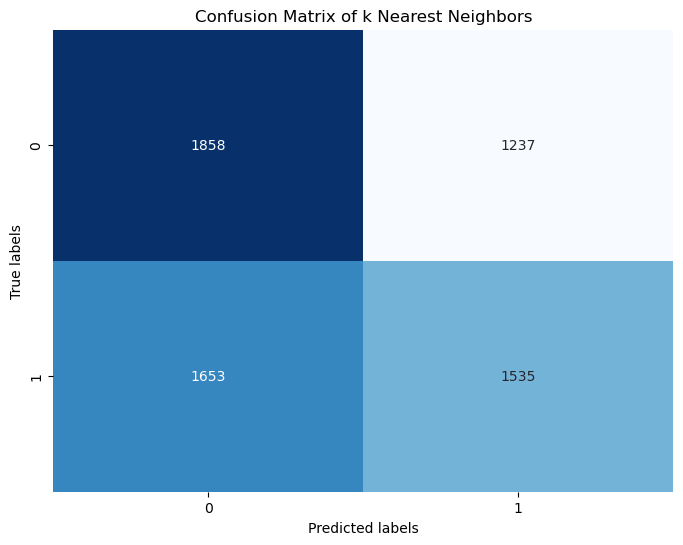

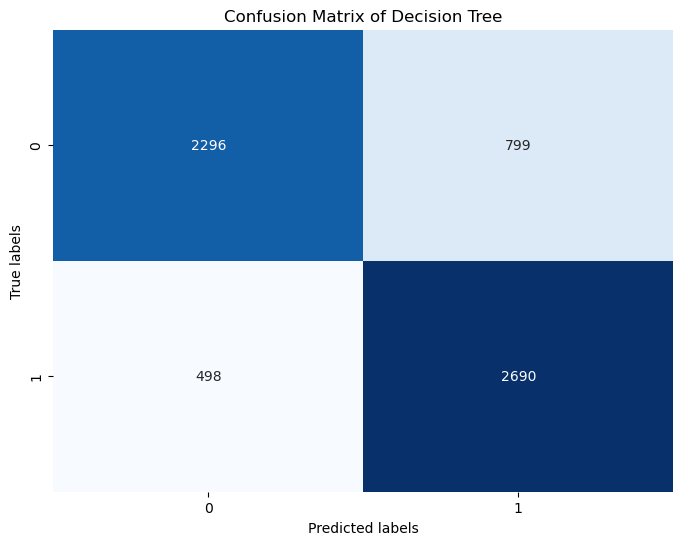

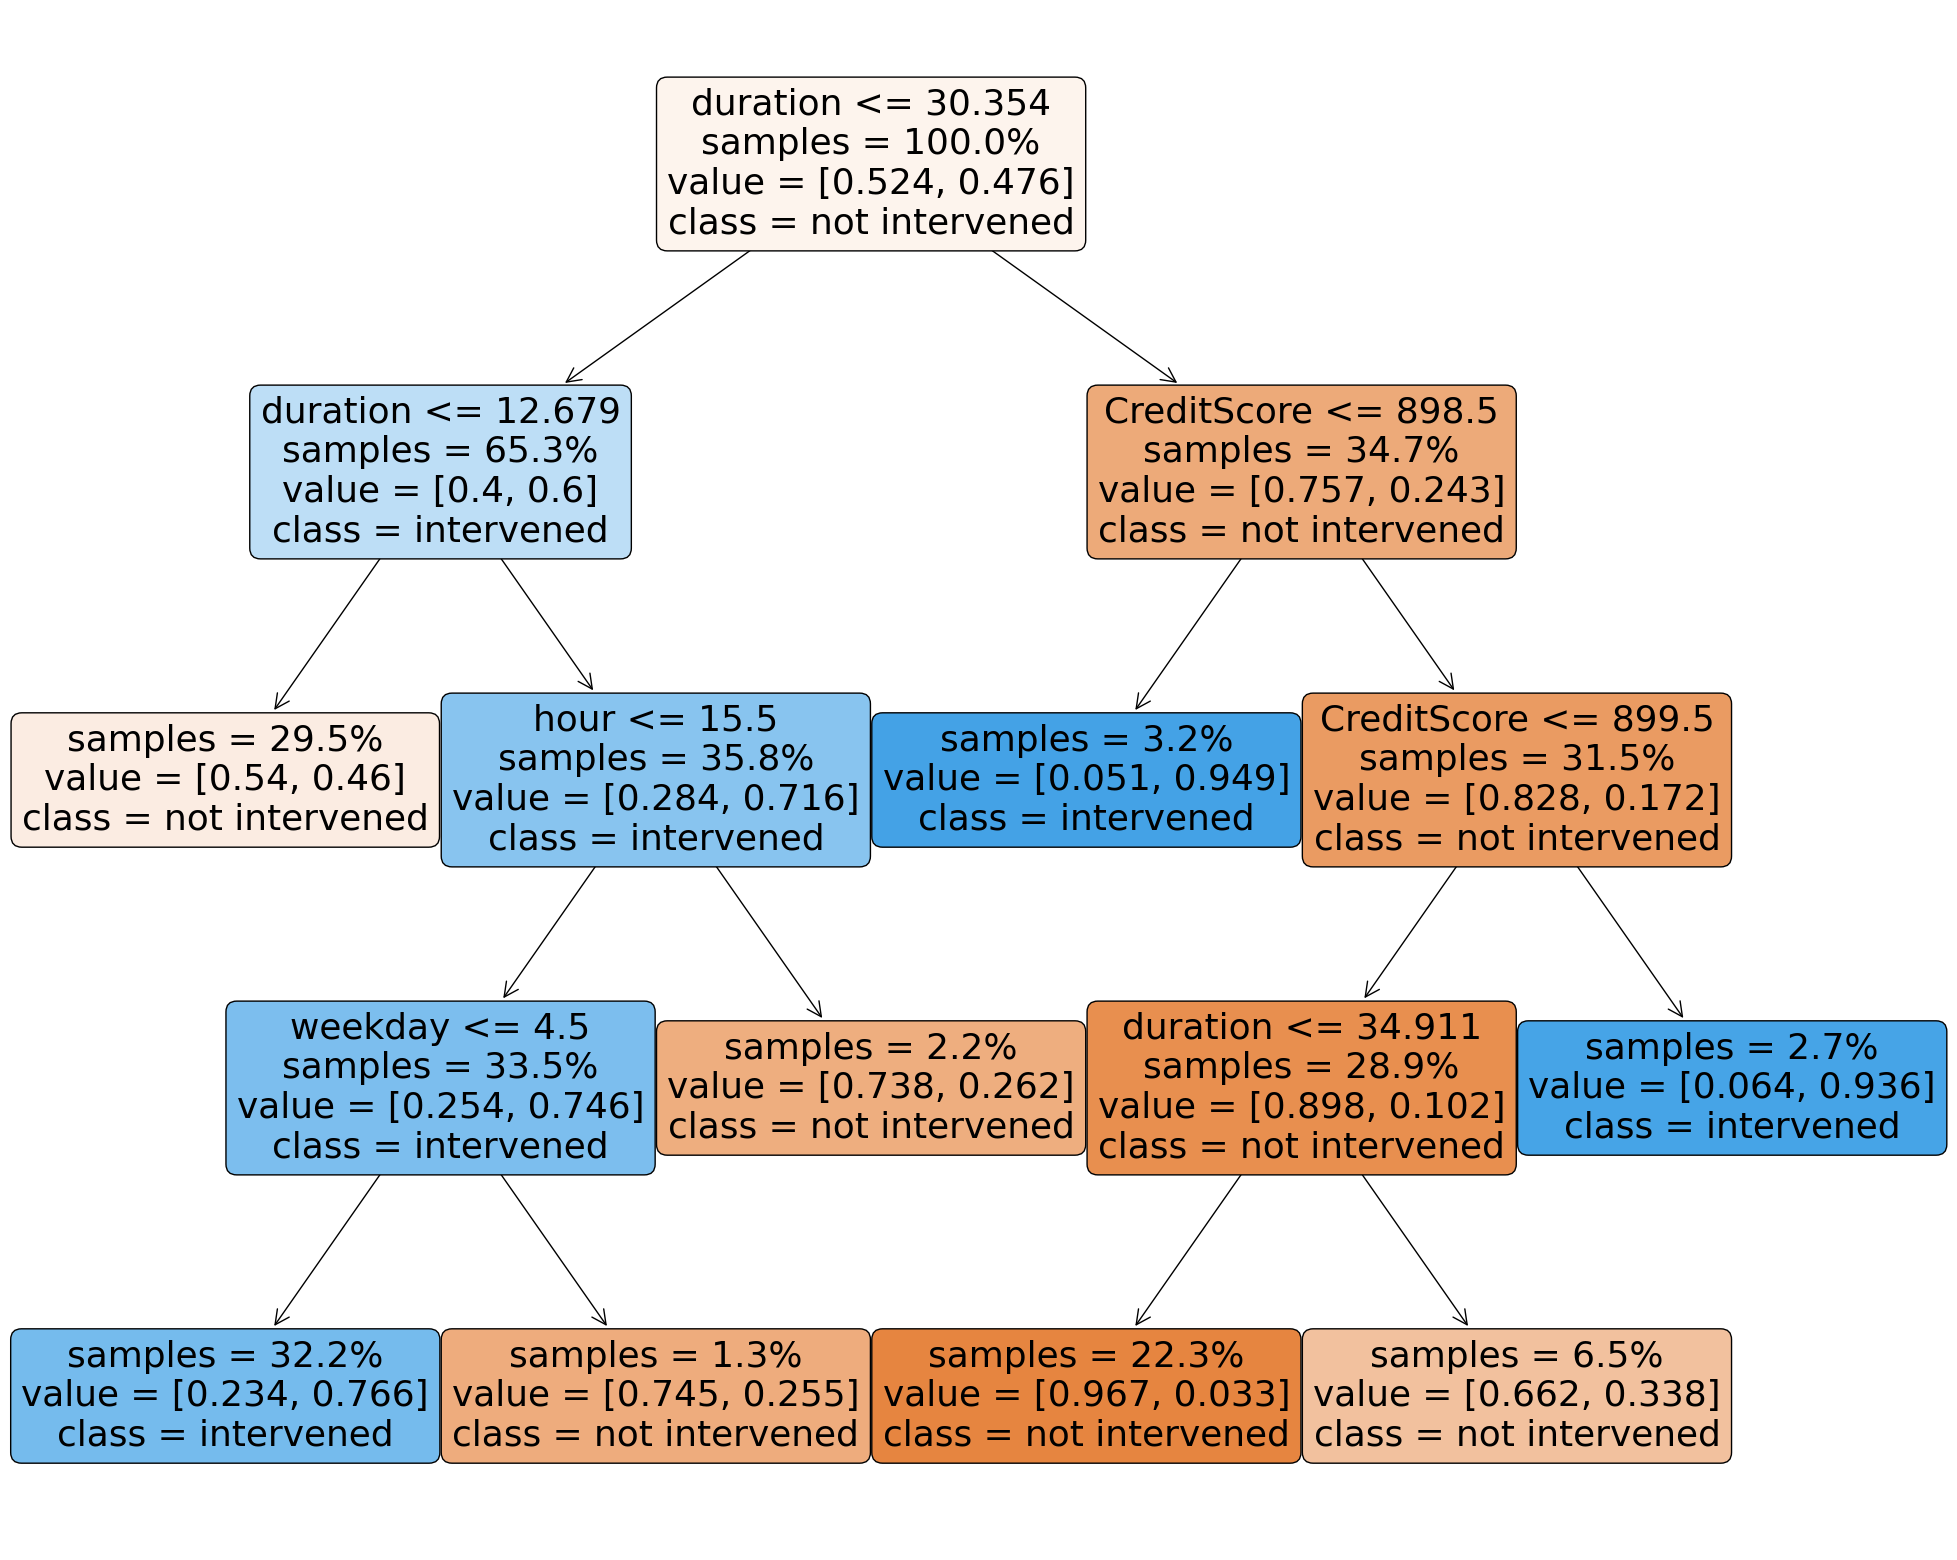

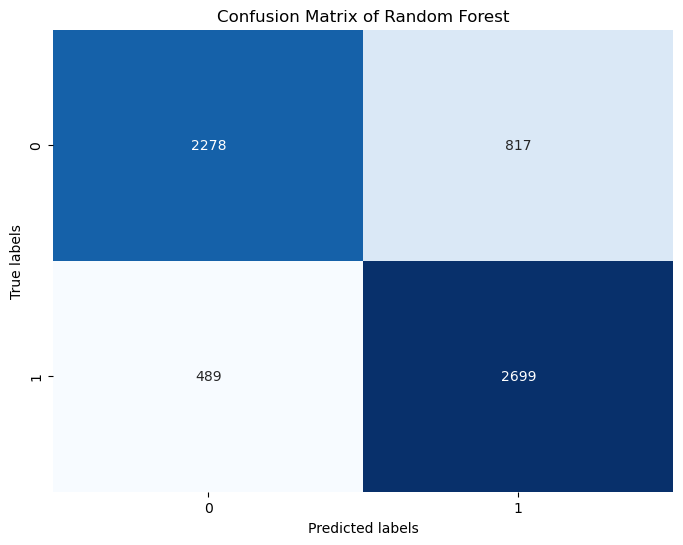

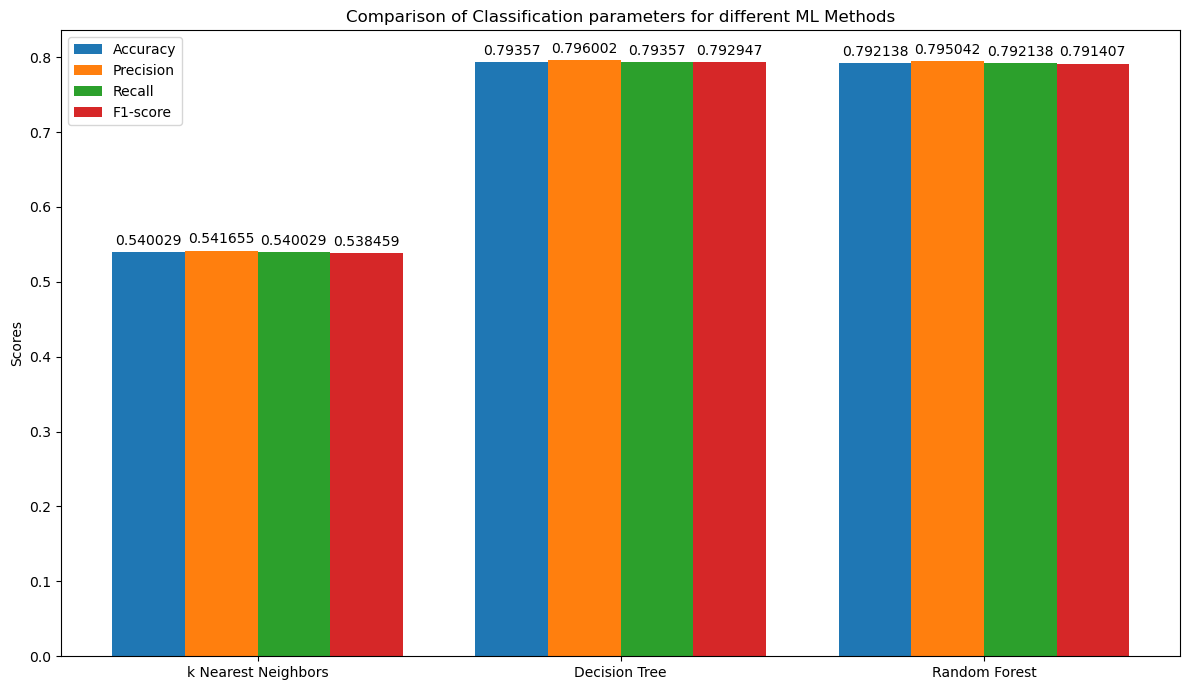

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree


def find_best_parameters(classifier_name, classifier, train_features, train_labels):
    # hyperparameter tuning (to reduce run time, param grids are limited around the optimum we found. To search in a larger grid commented param_grid could be used instead.)

    if classifier_name == "Nearest Neighbors":
        param_grid = {
            'n_neighbors': [5, 65, 66, 67],  # Number of neighbors to consider
            'weights': ['distance'],  # Weights used in prediction
            'p': [1],  # Power parameter for Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
        }

    elif classifier_name == "Decision Tree":
        param_grid = {
            'max_depth': [4, 5, 6, 7], 
            'criterion': ['entropy'],
            'min_samples_leaf': [3, 5, 10],
            'ccp_alpha': [0.01],
        }

    elif classifier_name == "Random Forest":
        param_grid = {
            'n_estimators': [5, 10, 50, 100], # Number of decision trees in the Random Forest
            'max_depth': [4,5,6,7], # Maximum depth of each decision tree
            'min_samples_split': [2], # Minimum number of samples required to split a node
            'min_samples_leaf': [3,5,7,10], # Minimum number of samples required to be at a leaf node
            'max_features': ['auto'], # Number of features to consider for best split
            'random_state': [42] # Seed for random number generator
        }

    else:
        return classifier.get_params()

    # hyper-parameter tuning using cross validation with 5 folds and choosing the best according to f1 score
    # verbose = 2 for debugging
    grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1, verbose=0, scoring="f1_weighted")
    grid_search.fit(train_features, train_labels)

    best_params = grid_search.best_params_
    print("Best hyperparameters:", best_params)
    
    return best_params

# Function to visualize the decision tree
def visualize_decision_tree(dtree, feature_names, class_names, file_path):
    from sklearn.tree import plot_tree
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=((25,20)))
    
    _ = plot_tree(dtree,
                feature_names= feature_names,
                class_names= class_names, 
                filled= True,
                proportion= True,
                impurity= False,
                rounded= True)
    
    fig.savefig(file_path)
    
# Function to visualize the confusion matrix
def visualize_confusion_matrix(cm, labels, classifier_name, file_path):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(8,6))  # Added ax here
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels, ax=ax)  # Added ax=ax
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f"Confusion Matrix of {classifier_name}")  # Corrected the variable name
    
    fig.savefig(file_path)

# Function to visualize the comparison of evaluation for different ML algorithms
def visualize_classification_comparison(results, file_path):
    # Extract data from the results dictionary
    labels = list(results.keys())
    accuracy_vals = [res["Accuracy"] for res in results.values()]
    precision_vals = [res["Precision"] for res in results.values()]
    recall_vals = [res["Recall"] for res in results.values()]
    f1_vals = [res["F1-score"] for res in results.values()]

    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plotting the bars for each metric
    rects1 = ax.bar(x - width*1.5, accuracy_vals, width, label='Accuracy')
    rects2 = ax.bar(x - width/2, precision_vals, width, label='Precision')
    rects3 = ax.bar(x + width/2, recall_vals, width, label='Recall')
    rects4 = ax.bar(x + width*1.5, f1_vals, width, label='F1-score')

    # Setting labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Classification parameters for different ML Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)
    ax.bar_label(rects4, padding=3)

    fig.tight_layout()

    # Save the figure to the specified file path
    fig.savefig(file_path)

    

outputs_folder = "./outputs/"
decision_tree_output_file_name = "output_decision_trees.txt"
evaluation_output_file_name = "evaluation.txt"

classifier_names = [
    "k Nearest Neighbors",
    "Decision Tree",
    "Random Forest"
]


classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, ccp_alpha=0.003),
    RandomForestClassifier(max_depth=6, n_estimators=10, max_features=1)
]

dataset_df = bpic17_logs_with_interventions_df
dataset = bpic17_logs_with_interventions
dataset_name = "bpic17_logs_with_interventions"
dataset_feature_names = bpic17_logs_with_interventions_column_names
dataset_class_names = ["not intervened", "intervened"]


# Open text files
evaluation_output_file = open(
    file=outputs_folder + evaluation_output_file_name, mode="w"
)
decision_tree_output_file = open(
    file=outputs_folder + decision_tree_output_file_name, mode="w"
)


features, labels = dataset

# Split a data set: 80% for training set, 20% for testing set
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, shuffle=False)


out_text = f"Dataset: {dataset_name}-----------------------------\n\n"
print(out_text)
evaluation_output_file.write(out_text)
decision_tree_output_file.write(out_text)

results = {}

# Iterate over classifiers
for classifier_name, classifier in zip(classifier_names, classifiers):
    
    # Find best parameters - Hyper parameter tuning
    best_params = find_best_parameters(classifier_name, classifier, train_features, train_labels)

    classifier.set_params(**best_params)

    out_text_classifier = f"Classifier: {classifier_name}"
    out_text_parameters = f"\nParameters: {classifier.get_params()}"

    print(out_text_classifier)
    evaluation_output_file.write(
        out_text_classifier + out_text_parameters
    )

    # Train the classifier on the train set with tuned hyper parameters
    classifier.fit(train_features, train_labels)

    # Predict on the test set
    labels_prediction = classifier.predict(test_features)


    
    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(test_labels, labels_prediction)
    f1 = f1_score(test_labels, labels_prediction, average='weighted')
    precision = precision_score(test_labels, labels_prediction, average='weighted')
    recall = recall_score(test_labels, labels_prediction, average='weighted')
    

    # Store the evaluation in text file
    out_text = (
        f"Accuracy: {accuracy}\n" +
        f"Precision: {precision}\n" + 
        f"Recall: {recall}\n" +
        f"Accuracy: {f1}\n\n"
    )

    print(out_text)
    evaluation_output_file.write(out_text)
    
    # Store for plotting the chart
    results[classifier_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    
    # Generate the confusion matrix and Store it
    cm = confusion_matrix(test_labels, labels_prediction)
    cm_labels = [0,1]
    visualized_confusion_matrix_file_path = outputs_folder + 'confusion_matrix' + classifier_name + dataset_name + '.png'
    visualize_confusion_matrix(cm, cm_labels, classifier_name, visualized_confusion_matrix_file_path)
    

    if classifier_name == "Decision Tree":

        classifier.fit(features, labels)
            
        text_representation = tree.export_text(classifier, feature_names=dataset_feature_names)
        decision_tree_output_file.write(out_text_classifier + out_text_parameters)
        out_text_tree = (
            f"\n\nDecision Tree on the whole data set:\n{text_representation}\n\n"
        )
        decision_tree_output_file.write(out_text_tree)

        visualized_decision_tree_file_path = outputs_folder + 'decision_tree_' + dataset_name + '.png'
        visualize_decision_tree(classifier, dataset_feature_names, dataset_class_names, visualized_decision_tree_file_path)
        


evaluation_output_file.close()
decision_tree_output_file.close()


# Generate a visualization of evaluation comparison
classification_comparison_file_path = outputs_folder + 'classification_comparison_' + dataset_name + '.png'
visualize_classification_comparison(results, classification_comparison_file_path)

